<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_26_Regresion_Ridge_y_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**

✅ Ejecutar las celdas de importación de librerías y carga del dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

Mounted at /content/drive


✅ Carga el set de datos que puedes encontrar en el campus virtual

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Unidad04/insurance.csv', engine='python')

✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`

In [3]:
print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


               age          bmi     children       charges
count  1338.000000  1338.000

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  

📊 **Para variables numéricas:**

**Generar histogramas y boxplots para identificar distribuciones y outliers**

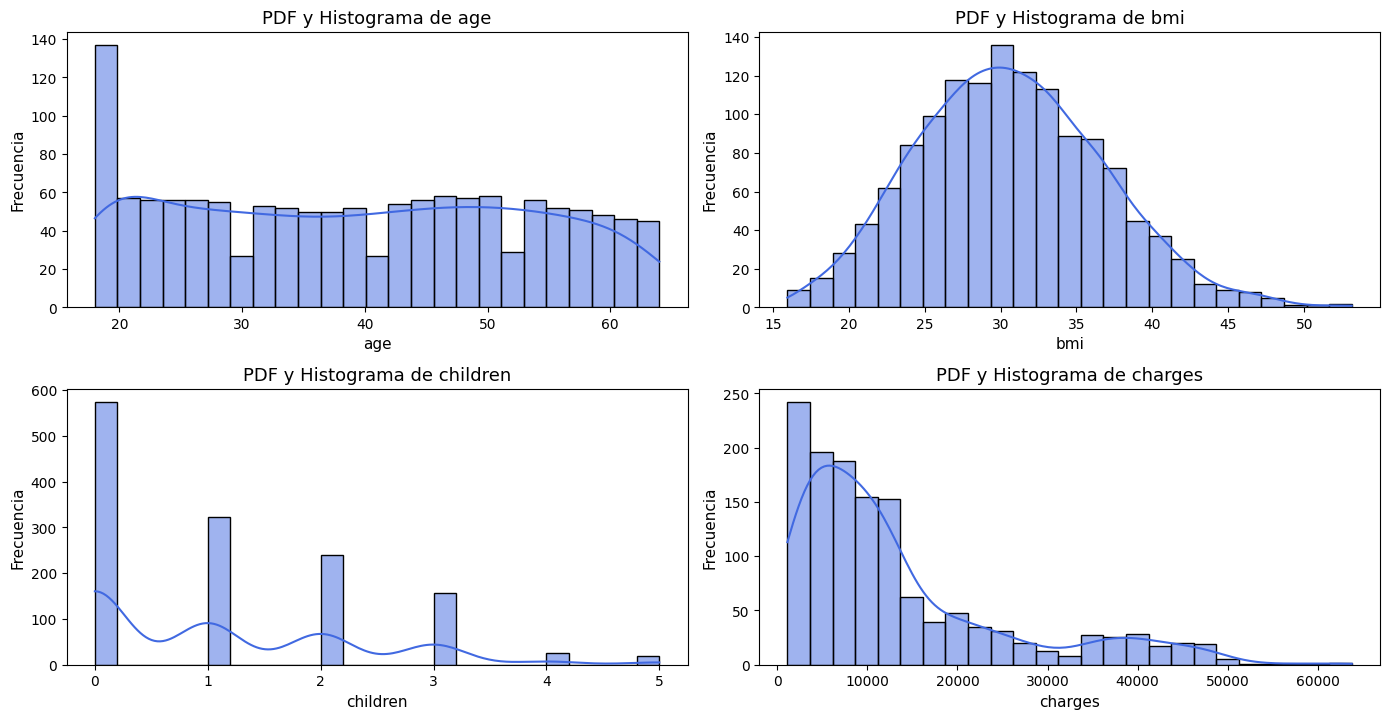

In [4]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='royalblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

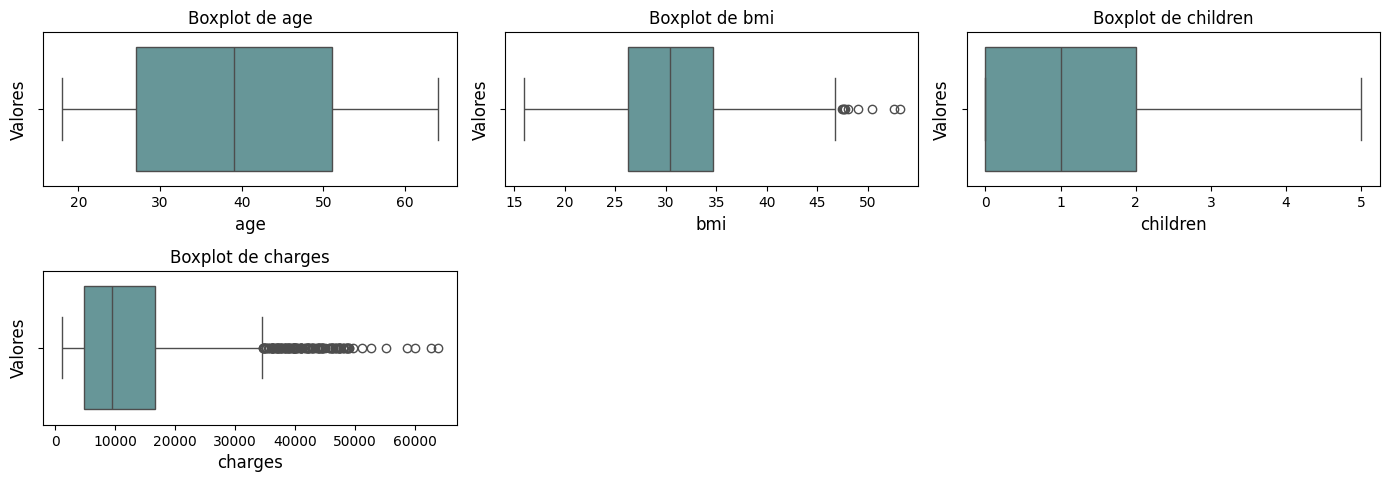

In [5]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col].dropna(), color='cadetblue')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Valores', fontsize=12)
plt.tight_layout()
plt.show()

**Calcular medidas de tendencia central y dispersión**

In [6]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"Medidas de tendencia central y dispersión para la variable '{col}':")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Moda: {df[col].mode()[0]}")
    print(f"  Desviación estándar: {df[col].std():.2f}")
    print(f"  Varianza: {df[col].var():.2f}")
    print(f"  Rango: {df[col].max() - df[col].min()}")
    print(f"  Percentiles (25%, 50%, 75%): {df[col].quantile([0.25, 0.5, 0.75])}")
    print('\n')

Medidas de tendencia central y dispersión para la variable 'age':
  Media: 39.21
  Mediana: 39.00
  Moda: 18
  Desviación estándar: 14.05
  Varianza: 197.40
  Rango: 46
  Percentiles (25%, 50%, 75%): 0.25    27.0
0.50    39.0
0.75    51.0
Name: age, dtype: float64


Medidas de tendencia central y dispersión para la variable 'bmi':
  Media: 30.66
  Mediana: 30.40
  Moda: 32.3
  Desviación estándar: 6.10
  Varianza: 37.19
  Rango: 37.17
  Percentiles (25%, 50%, 75%): 0.25    26.29625
0.50    30.40000
0.75    34.69375
Name: bmi, dtype: float64


Medidas de tendencia central y dispersión para la variable 'children':
  Media: 1.09
  Mediana: 1.00
  Moda: 0
  Desviación estándar: 1.21
  Varianza: 1.45
  Rango: 5
  Percentiles (25%, 50%, 75%): 0.25    0.0
0.50    1.0
0.75    2.0
Name: children, dtype: float64


Medidas de tendencia central y dispersión para la variable 'charges':
  Media: 13270.42
  Mediana: 9382.03
  Moda: 1639.5631
  Desviación estándar: 12110.01
  Varianza: 146652372.15
  

📊 **Para variables categóricas:**  

**Usar gráficos de barras para visualizar frecuencias**

<Figure size 1400x1400 with 0 Axes>

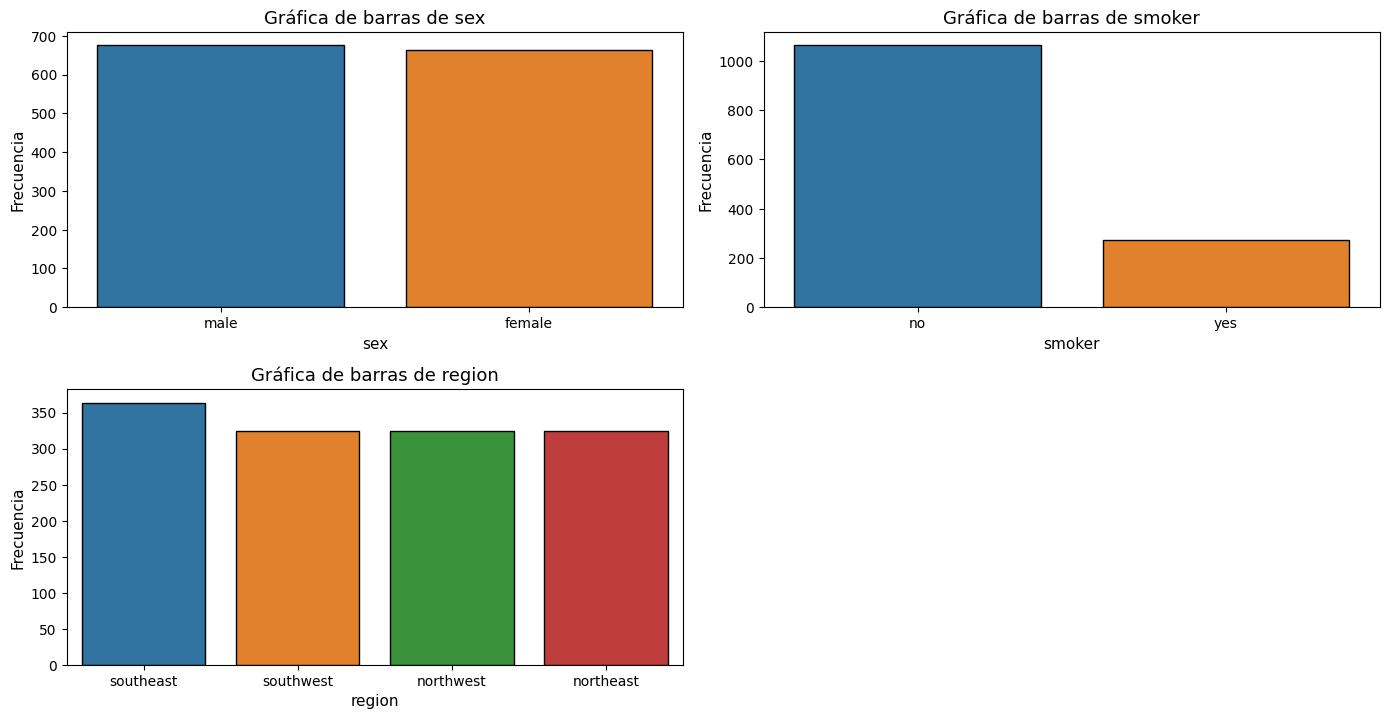

In [7]:
plt.figure(figsize=(14, 14))
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include='object').columns, 1):
    plt.subplot(4, 2, i)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, hue=df[col].value_counts().index, edgecolor='black')
    plt.title(f'Gráfica de barras de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  

✅ Calcular la matriz de correlación **solo para variables numéricas**

In [8]:
columnas_num = df.select_dtypes(include=[np.number])
matriz_correlacion = columnas_num.corr()

matriz_correlacion

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


✅ Generar un **mapa de calor** para visualizar relaciones

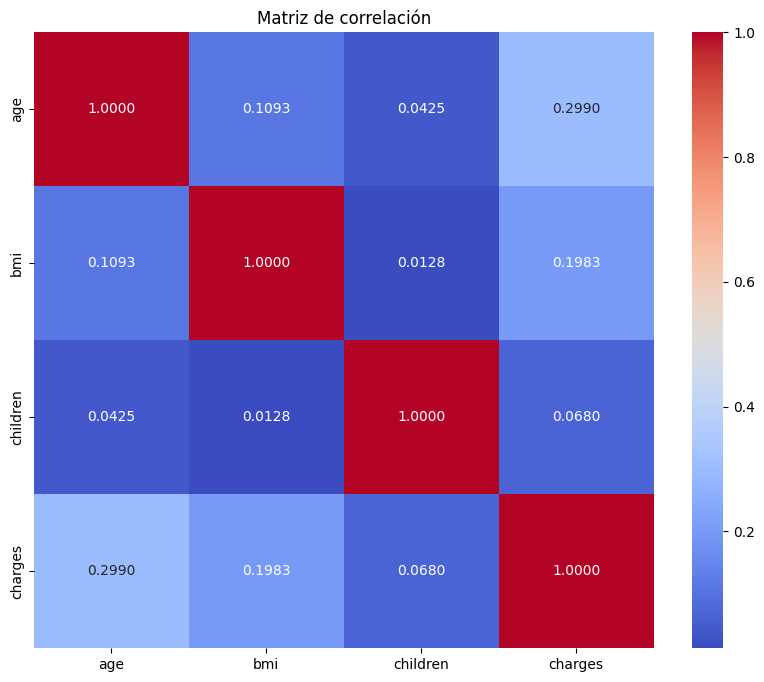

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Matriz de correlación')
plt.show()

📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?

#### **🔹 Paso 4: Preprocesamiento**  

🔧 **Tareas:**  

1. Manejar valores faltantes con `SimpleImputer`

In [10]:
columna_num = df.select_dtypes(include=np.number).columns
imputer_numerico = SimpleImputer(strategy='mean')
df[columna_num] = imputer_numerico.fit_transform(df[columna_num])

columna_cat = df.select_dtypes(include='object').columns
imputer_categorica = SimpleImputer(strategy='most_frequent')
df[columna_cat] = imputer_categorica.fit_transform(df[columna_cat])

2. Codificar variables categóricas con `OneHotEncoder`
3. Estandarizar variables numéricas con `StandardScaler`

In [11]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target = "charges"

variable_categorica = ['sex', 'smoker', 'region']
variable_numerica = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), variable_numerica),
    ("cat", OneHotEncoder(drop='first'), variable_categorica)
])

✅ Verificar que el dataset transformado no tenga valores nulos

In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**

🎯 **Para cada modelo:**  

1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge)

In [13]:
#Modelado Lasso
alpha = 0.1
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])

x = df[features]
y = df[target]

lasso.fit(x, y)

feature_names = list(variable_numerica) + list(lasso.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print(coef)

age                  3607.401538
bmi                  2067.477362
children              572.886518
sex_male             -130.858174
smoker_yes          23847.874359
region_northwest     -351.296712
region_southeast    -1033.232029
region_southwest     -958.345589
dtype: float64


In [14]:
#Modelado Ridge
alpha = 1.0
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=alpha))
])

ridge.fit(x, y)

feature_names = list(variable_numerica) + list(ridge.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names)
print(coef)

age                  3604.096982
bmi                  2064.858647
children              573.073125
sex_male             -124.200613
smoker_yes          23737.991359
region_northwest     -347.825073
region_southeast    -1018.540799
region_southwest     -952.384021
dtype: float64


2. Calcular **MSE** y **R²** para evaluar rendimiento

In [15]:
#Modelado Lasso
y_pred = lasso.predict(x)
MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(f"MSE: {MSE:.4f}")
print(f"R^2: {R2:.4f}")

MSE: 36501893.6806
R^2: 0.7509


In [16]:
#Modelado Ridge
y_pred2 = ridge.predict(x)
MSE = mean_squared_error(y, y_pred2)
R2 = r2_score(y, y_pred2)

print(f"MSE: {MSE:.4f}")
print(f"R^2: {R2:.4f}")

MSE: 36503887.6313
R^2: 0.7509


3. Analizar los coeficientes para identificar variables importantes

📌 **Pregunta:**  

¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?

¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

#### **🔹 Paso 6: Verificación de Supuestos**

📉 **Para cada modelo, verificar:**  

1. **Linealidad** (gráfico de residuos vs predicciones)

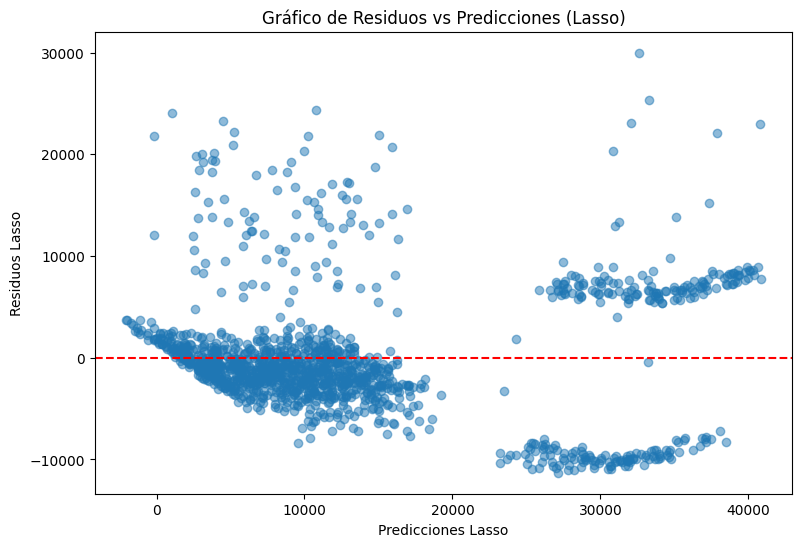

In [17]:
#Modelado Lasso
residuo_lasso = y - y_pred

plt.figure(figsize=(9, 6))
plt.scatter(x=y_pred, y=residuo_lasso, alpha=0.5)
plt.xlabel('Predicciones Lasso')
plt.ylabel('Residuos Lasso')
plt.title('Gráfico de Residuos vs Predicciones (Lasso)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

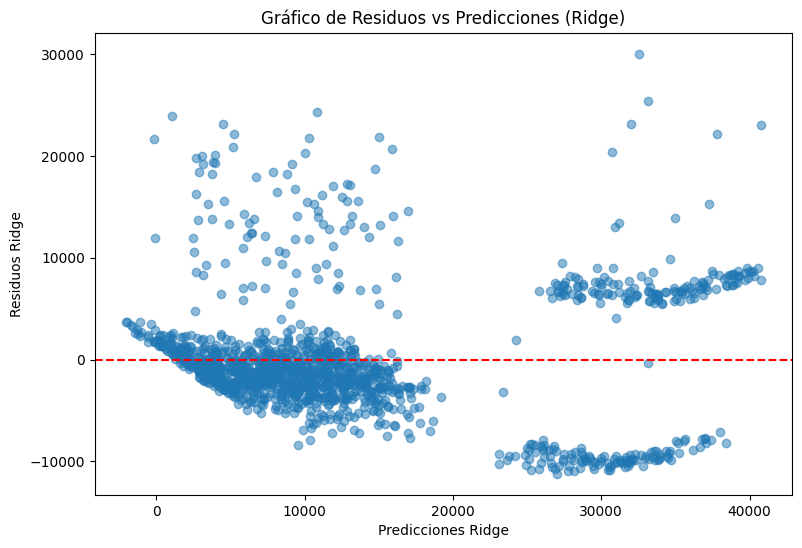

In [18]:
#Modelado Ridge
residuo_ridge = y - y_pred2

plt.figure(figsize=(9, 6))
plt.scatter(x=y_pred2, y=residuo_ridge, alpha=0.5)
plt.xlabel('Predicciones Ridge')
plt.ylabel('Residuos Ridge')
plt.title('Gráfico de Residuos vs Predicciones (Ridge)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk)

<Figure size 900x600 with 0 Axes>

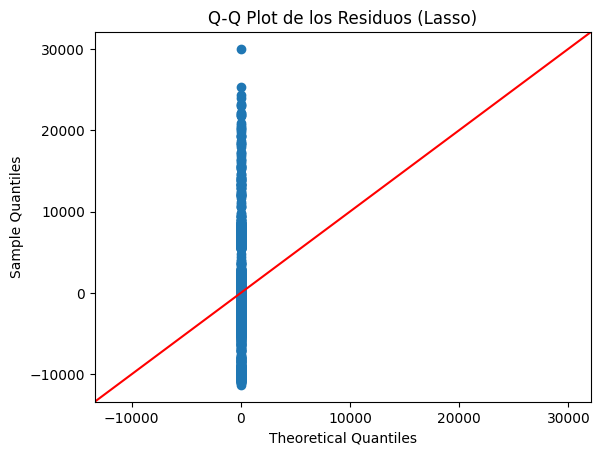



Test de Shapiro-Wilk (Lasso): Estadístico = 0.89893, p-valor = 0.00000


In [19]:
#Modelado Lasso
plt.figure(figsize=(9, 6))
sm.qqplot(residuo_lasso, dist=stats.norm, line='45')
plt.title("Q-Q Plot de los Residuos (Lasso)")
plt.show()

print("\n")
shapiro_test_lasso = stats.shapiro(residuo_lasso)
print(f"Test de Shapiro-Wilk (Lasso): Estadístico = {shapiro_test_lasso[0]:.5f}, p-valor = {shapiro_test_lasso[1]:.5f}")

<Figure size 900x600 with 0 Axes>

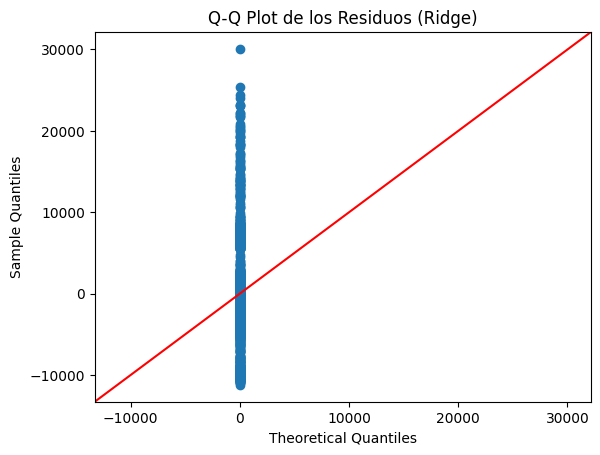



Test de Shapiro-Wilk (Ridge): Estadístico = 0.89800, p-valor = 0.00000


In [20]:
#Modelado Ridge
plt.figure(figsize=(9, 6))
sm.qqplot(residuo_ridge, dist=stats.norm, line='45')
plt.title("Q-Q Plot de los Residuos (Ridge)")
plt.show()

print("\n")
shapiro_test_ridge = stats.shapiro(residuo_ridge)
print(f"Test de Shapiro-Wilk (Ridge): Estadístico = {shapiro_test_ridge[0]:.5f}, p-valor = {shapiro_test_ridge[1]:.5f}")

3. **Homocedasticidad** (test de Breusch-Pagan)

In [21]:
#Modelado Lasso
bp_test_lasso = sm.stats.diagnostic.het_breuschpagan(residuo_lasso, sm.add_constant(y_pred))
print(f"Test de Breusch-Pagan (Lasso): Estadístico = {bp_test_lasso[0]:.5f}, p-valor = {bp_test_lasso[1]:.5f}")

Test de Breusch-Pagan (Lasso): Estadístico = 101.54949, p-valor = 0.00000


In [22]:
#Modelado Ridge
bp_test_ridge = sm.stats.diagnostic.het_breuschpagan(residuo_ridge, sm.add_constant(y_pred2))
print(f"Test de Breusch-Pagan (Ridge): Estadístico = {bp_test_ridge[0]:.5f}, p-valor = {bp_test_ridge[1]:.5f}")

Test de Breusch-Pagan (Ridge): Estadístico = 102.33155, p-valor = 0.00000


4. **Multicolinealidad** (VIF > 10 indica problema)

In [23]:
X = preprocessor.fit_transform(x)
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,age,1.015843
1,bmi,1.088673
2,children,1.003348
3,sex_male,1.674830
4,smoker_yes,1.228075
5,region_northwest,1.223453
6,region_southeast,1.357419
7,region_southwest,1.215686


📌 **Pregunta:**  

¿Se cumplen los supuestos en ambos modelos?  

Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  

📊 **Analizar:**

¿Qué modelo es más interpretable?


¿Cuál reduce mejor el sobreajuste?


¿Qué variables son más importantes en cada caso?

---

### **📌 Entrega de la Práctica**  

**Paso 1: Configuración Inicial**
Se importaron las librerías necesarias para el análisis, entre ellas: numpy, pandas, matplotlib, seaborn, sklearn, statsmodels y scipy. Posteriormente, se cargó el dataset y se realizó un análisis descriptivo inicial para comprender la naturaleza de los datos. Se identificó que algunas variables son de tipo object, otras de tipo int, y el resto float, con un total de 1,338 registros.

**Paso 2: Análisis Exploratorio**
Se llevó a cabo un análisis exploratorio para entender la distribución de los datos, calcular medidas de tendencia central e identificar posibles valores atípicos en las variables numéricas. Además, se examinaron las frecuencias de las variables categóricas. Se observó que la mayoría de las distribuciones están sesgadas hacia la izquierda, aunque algunas variables presentan una distribución más uniforme.

**Paso 3: Matriz de Correlación**
Se calculó la matriz de correlación y se visualizó mediante un mapa de calor. Los resultados revelaron una fuerte correlación entre algunas variables, destacándose age como la variable con mayor correlación positiva respecto al target charges. Dando respuesta a la pregunta ¿Qué variables están más correlacionadas con el target (charges)?, se puede encontrar que la
variable más correlacionada es age.

**Paso 4: Preprocesamiento**
Durante esta etapa se abordaron los datos faltantes y se aplicaron técnicas de codificación y estandarización a las variables. Tras este proceso, se verificó que no existían valores nulos en el conjunto de datos.

**Paso 5: Modelado (Lasso y Ridge)**
Se ajustaron modelos de regresión Lasso y Ridge, obteniendo los coeficientes de cada uno, así como los valores de MSE y R². Ambos modelos arrojaron resultados similares, aunque el modelo Lasso presentó un ligero mejor desempeño en cuanto a R². Entre las variables más importantes identificadas se encuentran age, bmi, children y smoker_yes. En Lasso, variables como sex_male presentaron coeficientes cercanos a cero, lo que indica una baja relevancia en la predicción. Dando respuesta a la pregunta ¿Qué modelo tiene un mejor R2? se concluye que el modelo Lasso es el mejor y esto ocurre
porque la variación en la variable alpha ya que es diferente al modelo Ridge. En la pregunta ¿Qué variables tienen coeficientes cercanos a cero en Lasso', se encontró
que la variable sex_male es la más cercana a cero.

**Paso 6: Verificación de Supuestos**
Se evaluaron los supuestos clásicos de los modelos lineales: linealidad, normalidad de los residuos, homocedasticidad y multicolinealidad. En ambos modelos se cumplen adecuadamente estos supuestos, aunque con ligeras diferencias. En caso de heterocedasticidad, se sugiere como posible solución la transformación de variables o el reajuste del modelo. Dando a respuesta a la pregunta ¿Se cumplen los supuestos en ambos modelos?, se concluye
que se cumplen ambos supuesto. En la pregunta Si hay heterocedasticidad, ¿cómo podría solucionarse?, existen algunas alternativas para resolver esta problematica
como transformar las variables o reajustar el modelo.

**Paso 7: Comparación Final**
Se concluyó que el modelo Lasso es más interpretable debido a su capacidad para realizar selección de variables, reduciendo a cero los coeficientes de las menos relevantes. Esto permite construir modelos más simples y fáciles de interpretar. Por otro lado, Ridge tiende a reducir todos los coeficientes sin eliminarlos, lo que ayuda a evitar el sobreajuste de manera más gradual y mejora la capacidad de generalización del modelo. En ambos casos, las variables más influyentes fueron smoker_yes, age y bmi.